In [1]:
#!pip install wordcloud
!pip install pymorphy2

  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=a17f5b5ab4769e77330950800c2f8c8cd4bfecd0137a654ec7d46be984e7b27c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [295]:
import pandas as pd
import numpy as np
import ast
from numpy import nan
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import tqdm
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
import pymorphy2
from scipy import stats

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [296]:
group_data = pd.read_excel(r'C:\Users\User\Desktop\Прога\Питон\аналитика вк\парсинг вк\group_data.xlsx')

In [297]:
group_data['likes'] = group_data['likes'].apply(lambda x: ast.literal_eval(x)['count'])
group_data['post_source'] = group_data['post_source'].apply(lambda x: ast.literal_eval(x)['type'])
group_data['comments'] = group_data['comments'].apply(lambda x: ast.literal_eval(x)['count'])
group_data['reposts'] = group_data['reposts'].apply(lambda x: ast.literal_eval(x)['count'])

In [298]:
group_data = group_data.drop(columns=['Unnamed: 0', 'from_id', 'group_id', 'copy_history', 'signer_id', 'attachments'])

In [299]:
group_ids = [-65596623, -57846937, -150550417, -28905875, -73247559, -66678575, -31480508, -88245281, -29573241]
group_names = ['FTP', 'MDK', 'Reddit', 'Рифмы и панчи', 'ВПШ', 'Овсянка', 'Пикабу', 'На приеме у шевцова', 'NR']
group_names_df = pd.DataFrame({'owner_id':group_ids, 'group_names':group_names})

In [300]:
group_data = group_data.merge(group_names_df, on='owner_id', how='left')

In [301]:
group_data['date'] = [datetime.fromtimestamp(x) for x in group_data['date']]
group_data['day'] = group_data['date'].dt.date
group_data['hour'] = group_data['date'].dt.hour
group_data['day_of_week'] = group_data['date'].dt.weekday

Обработаем текст описания

In [302]:
def preprocessing_text(texts):
    my_words = set({'это', "который", "комментарий", "новый", "год"})
    eng = set(stopwords.words('english'))
    rus = set(stopwords.words('russian'))
    stop = eng | rus | my_words
    
    regex = re.compile('[^а-яА-Я]')
    preprocess_texts = []
    for i in  tqdm.tqdm(range(len(texts))):
        text = texts[i].lower()
        text = regex.sub(' ', text)
        word_tokens = word_tokenize(text)
        filtered_str = [w for w in word_tokens if not w in stop] 
        preprocess_texts.append( ' '.join(filtered_str))
    
    return preprocess_texts
        


In [303]:
def text_stem(texts):
    st = SnowballStemmer("russian")
    stem_text = []
    for text in tqdm.tqdm(texts):
        tokenised_text = word_tokenize(text)
        stem_text.append(' '.join([st.stem(word) for word in tokenised_text]))
    return stem_text

In [304]:
def text_lem(texts):
    lem = pymorphy2.MorphAnalyzer()
    lem_text = []
    for text in tqdm.tqdm(texts):
        tokenised_text = word_tokenize(text)
        lem_text.append(' '.join([lem.parse(word)[0].normal_form for word in tokenised_text]))
    return lem_text

In [305]:
group_data.iloc[8414, :]

id                                                        75204920
owner_id                                                 -66678575
date                                           2021-07-06 00:33:24
marked_as_ads                                                    0
post_type                                                     post
text             Я запрещаю вам смотреть в зеркало заднего вида...
post_source                                                    mvk
comments                                                       139
likes                                                         8010
reposts                                                        139
copyright                                                      NaN
is_pinned                                                      NaN
group_names                                                Овсянка
day                                                     2021-07-06
hour                                                          

In [306]:
group_data['text'].fillna('', inplace=True)
group_data['text'] = preprocessing_text(group_data['text'])
group_data['text'] = text_lem(group_data['text'])
group_data['text'] = preprocessing_text(group_data['text'])

100%|██████████| 9000/9000 [00:01<00:00, 6981.23it/s]


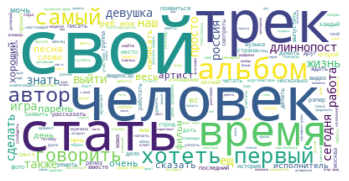

In [307]:
text = " ".join(desc for desc in group_data.text)
wordcloud = WordCloud(background_color="white").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

word cloud отдельно по пабликам

In [350]:
df = group_data.groupby('group_names')['text'].agg(lambda x: ' '.join(x))

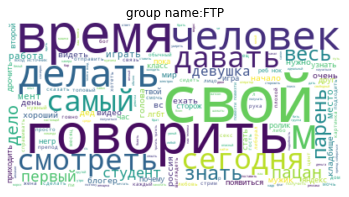

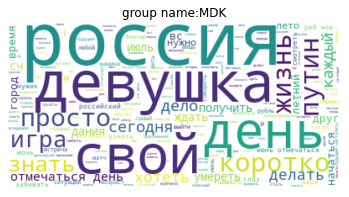

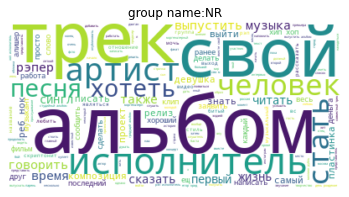

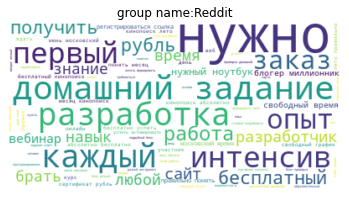

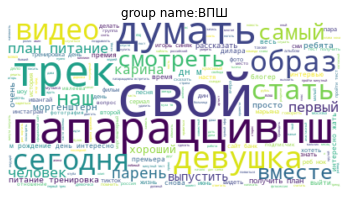

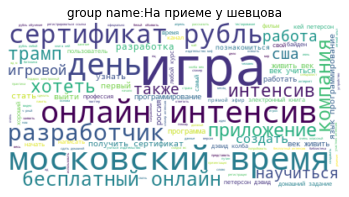

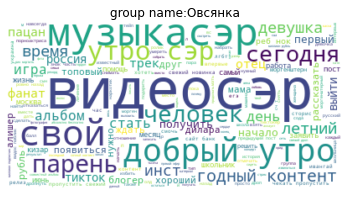

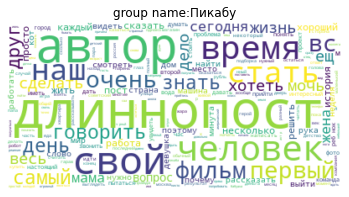

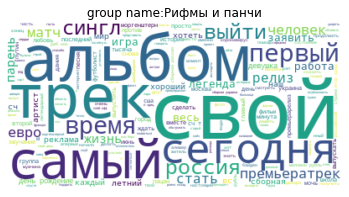

In [362]:
for group, text in df.items():
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('group name: {}'.format(group))
    plt.show()

In [338]:
group_data.groupby('group_names', as_index=False)['text']

In [308]:
group_data.head()

,id,owner_id,date,marked_as_ads,post_type,text,post_source,comments,likes,reposts,copyright,is_pinned,group_names,day,hour,day_of_week
0,16534261,-29573241,2021-05-30 20:13:48,0,post,хотеть стать первый рэпер побывать космос рэпе...,vk,45,610,106,NaN,NaN,NR,2021-05-30,20,6
1,16534178,-29573241,2021-05-30 19:45:00,0,post,бренд,vk,32,1265,90,NaN,NaN,NR,2021-05-30,19,6
2,16534104,-29573241,2021-05-30 19:28:05,0,post,выложить текст свой грядущий трек премьера близко,vk,203,753,390,NaN,NaN,NR,2021-05-30,19,6
3,16534010,-29573241,2021-05-30 18:35:00,0,post,хотеть юзать откровенный разговор муза пьянить...,vk,22,472,223,NaN,NaN,NR,2021-05-30,18,6
4,16533938,-29573241,2021-05-30 18:10:00,0,post,первый сниматься кино выпуск свой видеоблог не...,vk,29,541,252,NaN,NaN,NR,2021-05-30,18,6


Удалим выбросы по 3 сигме и заполним пропуски в данных

In [309]:
group_data.fillna(0, inplace=True)
group_data = group_data[group_data['post_source'] != 'mvk']
group_data = group_data[(np.abs(stats.zscore(group_data[['comments', 'likes', 'reposts']])) < 3).all(axis=1)]

In [310]:
group_data.groupby('post_source')['likes', 'reposts', 'comments'].agg(['count', 'mean', 'median'])

<ipython-input-310-0db58a4e5012>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_data.groupby('post_source')['likes', 'reposts', 'comments'].agg(['count', 'mean', 'median'])


likes                      reposts                     comments  \
            count          mean median   count         mean median    count   
post_source                                                                   
api          2633  10549.292442   7865    2633  1292.907710    711     2633   
vk           5981   3938.400769   2468    5981  1049.851697    579     5981   

                                
                   mean median  
post_source                     
api          234.746297    162  
vk            99.213509     50

In [366]:
group_data.groupby('group_names')['likes'].agg(['count', 'mean', 'median']).sort_values(by='mean', ascending=False)

,count,mean,median
group_names,,,
На приеме у шевцова,934,16206.882227,16542.0
ВПШ,830,13418.583133,12973.0
Рифмы и панчи,960,6939.776042,5853.0
Овсянка,942,5927.000000,5085.0
Reddit,1000,4352.589000,3484.0
MDK,955,3505.221990,2815.0
Пикабу,998,2593.611222,2610.5
NR,998,1301.806613,1005.0
FTP,997,1227.771314,826.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


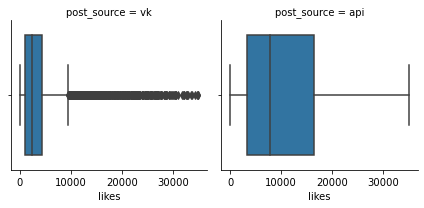

In [311]:
g = sns.FacetGrid(group_data, col="post_source");
g.map(sns.boxplot, 'likes');

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


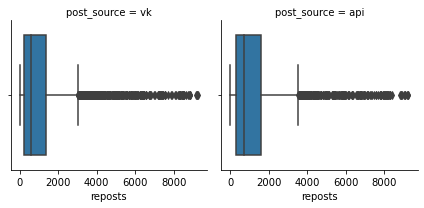

In [312]:
g = sns.FacetGrid(group_data, col="post_source");
g.map(sns.boxplot, 'reposts');

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


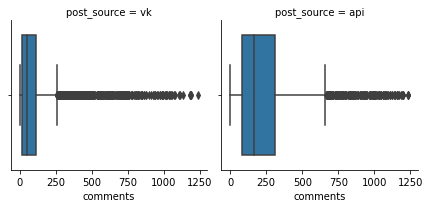

In [313]:
g = sns.FacetGrid(group_data, col="post_source");
g.map(sns.boxplot, 'comments');

Можем заметить, что у записей, опубликованных через api показатели выше. Полагаю, что паблики с большим количеством подписчиков заливают посты через api

In [314]:
group_data.groupby(['post_source', 'group_names'])['likes'].agg(['count', 'mean', 'median']).sort_values(by='mean', ascending=False)

count          mean   median
post_source group_names                                      
api         На приеме у шевцова    486  18351.452675  18311.5
            ВПШ                    755  14468.618543  14316.0
vk          На приеме у шевцова    448  13880.406250  14340.5
api         Рифмы и панчи          298   7210.902685   6247.0
            Овсянка                755   7049.953642   6106.0
vk          Рифмы и панчи          662   6817.728097   5762.0
api         Reddit                   9   4958.888889   4193.0
vk          Reddit                 991   4347.082745   3479.0
            MDK                    862   3537.120650   2878.5
api         Пикабу                   5   3502.200000   2619.0
            MDK                     93   3209.559140   2283.0
vk          ВПШ                     75   2848.226667    391.0
            Пикабу                 993   2589.036254   2609.0
            FTP                    765   1467.461438   1069.0
            Овсянка                187   1393.149733    576.0
            NR                     998   1301.806613   1005.0
api         FTP                    232    437.413793    281.5

Так и есть, скорее всего все портит паблик ВПШ, который в основном заливает посты через api, лайки на которых значительно выше, построим графики без него

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


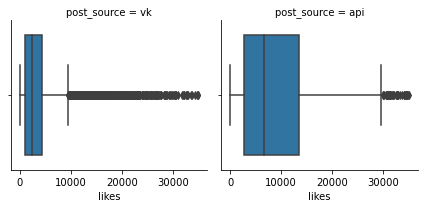

In [315]:
g = sns.FacetGrid(group_data[group_data['group_names'] != 'ВПШ'], col="post_source");
g.map(sns.boxplot, 'likes');

В графиках мало что поменялось, проверим гипотезу о равенстве средних на уровне значимости 5%.
Наблюдений много, поэтому воспользуемся асимптотикой

In [316]:
vk = group_data[(group_data['post_source'] == 'vk') & (group_data['group_names'] != 'ВПШ')]['likes']
api = group_data[(group_data['post_source'] == 'api') & (group_data['group_names'] != 'ВПШ')]['likes']

In [317]:
alpha = 0.05
nu1 = vk.mean()
nu2 = api.mean()
diff = nu2 - nu1
std1 = vk.var(ddof=1)
std2 = api.var(ddof=1)
z_obs = diff * np.sqrt(std1/vk.size + std2/api.size)
z_crit = stats.norm().ppf(1-alpha/2)
p_value = 2* (1 - (stats.norm().cdf(z_obs)))
print('z_obs:{}, z_crit:{}, p_value:{}'.format(z_obs, z_crit, p_value))

z_obs:990053.2252437536, z_crit:1.959963984540054, p_value:0.0


Найдем самое лучшее время для публикации

In [318]:
group_data.head()

,id,owner_id,date,marked_as_ads,post_type,text,post_source,comments,likes,reposts,copyright,is_pinned,group_names,day,hour,day_of_week
0,16534261,-29573241,2021-05-30 20:13:48,0,post,хотеть стать первый рэпер побывать космос рэпе...,vk,45,610,106,0,0.0,NR,2021-05-30,20,6
1,16534178,-29573241,2021-05-30 19:45:00,0,post,бренд,vk,32,1265,90,0,0.0,NR,2021-05-30,19,6
2,16534104,-29573241,2021-05-30 19:28:05,0,post,выложить текст свой грядущий трек премьера близко,vk,203,753,390,0,0.0,NR,2021-05-30,19,6
3,16534010,-29573241,2021-05-30 18:35:00,0,post,хотеть юзать откровенный разговор муза пьянить...,vk,22,472,223,0,0.0,NR,2021-05-30,18,6
4,16533938,-29573241,2021-05-30 18:10:00,0,post,первый сниматься кино выпуск свой видеоблог не...,vk,29,541,252,0,0.0,NR,2021-05-30,18,6


In [430]:
ad_by_h = group_data.groupby(['marked_as_ads', 'hour'])['likes'].agg('count')
state_pcts = ad_by_h.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts1 = pd.DataFrame(state_pcts).reset_index()

state_pcts

marked_as_ads  hour
0              0        6.081969
               1        4.361333
               2        5.245549
               3        1.445812
               4        0.896164
               5        0.669136
               6        0.561596
               7        0.752778
               8        1.326323
               9        2.389772
               10       3.369578
               11       2.760186
               12       4.994623
               13       5.138009
               14       5.568168
               15       5.114112
               16       6.320946
               17       6.416537
               18       7.049827
               19       5.365038
               20       6.368742
               21       5.783248
               22       6.404588
               23       5.615964
1              0        2.040816
               1        0.816327
               2        0.408163
               6        0.816327
               7        0.408163
               8       

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


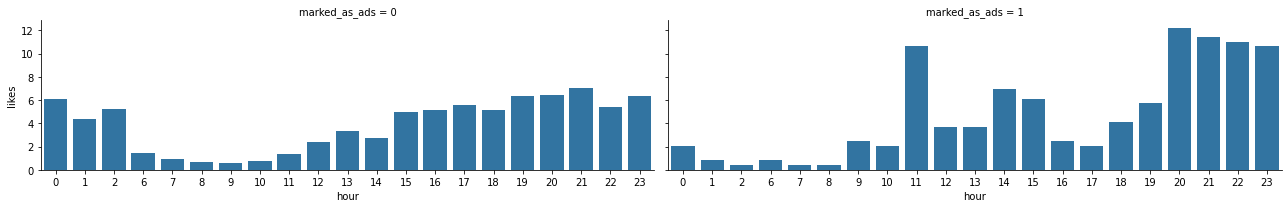

In [432]:
g = sns.FacetGrid(state_pcts1, col="marked_as_ads", aspect=3);
g.map(sns.barplot, 'hour', 'likes');

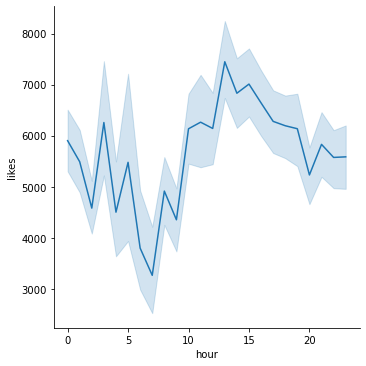

In [327]:
sns.relplot(data=group_data, x='hour', y='likes', kind='line')


<AxesSubplot:xlabel='hour', ylabel='likes'>

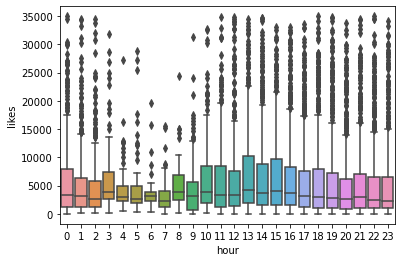

In [328]:
sns.boxplot(data=group_data, x='hour', y='likes')

<AxesSubplot:xlabel='day_of_week', ylabel='likes'>

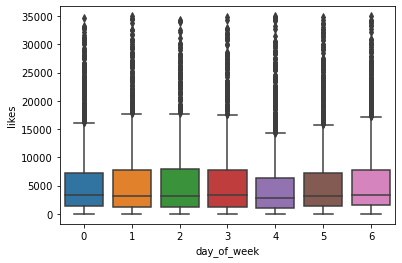

In [329]:
sns.boxplot(data=group_data, x='day_of_week', y='likes')

<AxesSubplot:xlabel='day_of_week', ylabel='likes'>

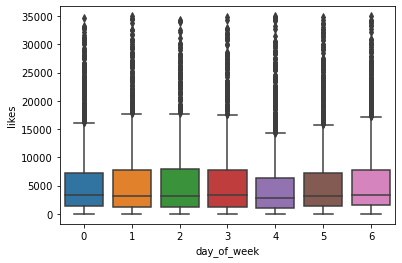

In [330]:
sns.boxplot(data=group_data, x='day_of_week', y='likes')

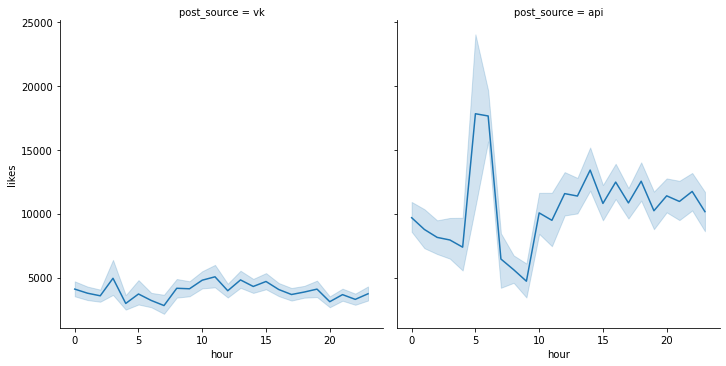

In [319]:
sns.relplot(data=group_data, x="hour", y="likes", col="post_source", kind='line')

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


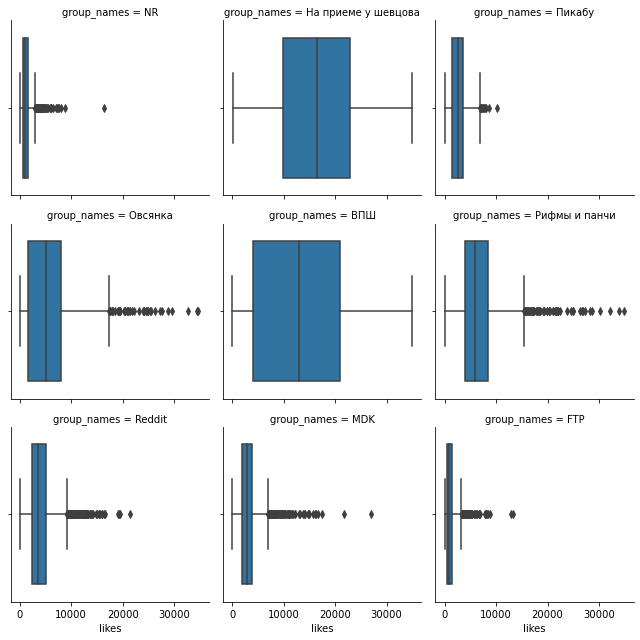

In [391]:
g = sns.FacetGrid(group_data, col="group_names", col_wrap=3);
g.map(sns.boxplot, 'likes');

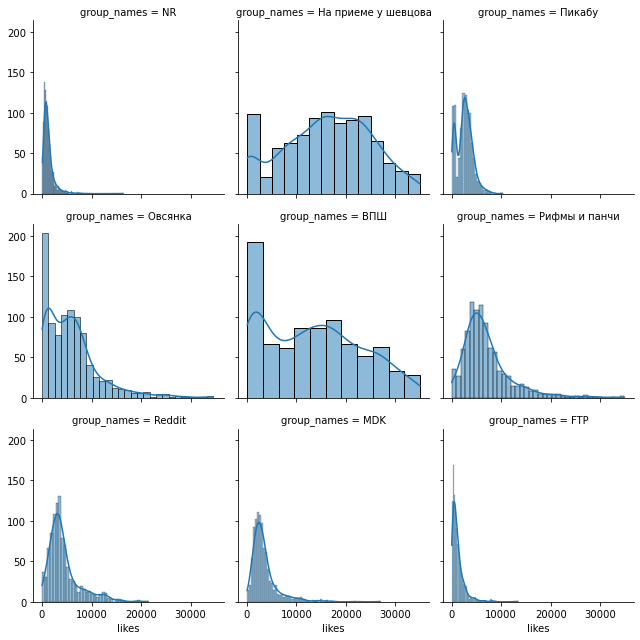

In [392]:
g = sns.FacetGrid(group_data, col="group_names", col_wrap=3);
g.map(sns.histplot, 'likes', kde=True);

In [378]:
group_data['word_num_desc'] = group_data['text'].apply(lambda x: len(x.split()))

In [381]:
group_data.word_num_desc.describe()

count    8614.000000
mean        9.423148
std        19.571755
min         0.000000
25%         0.000000
50%         2.000000
75%        10.000000
max       388.000000
Name: word_num_desc, dtype: float64

<AxesSubplot:>

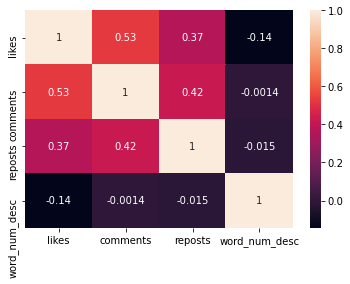

In [382]:
sns.heatmap(group_data[['likes', 'comments', 'reposts', 'word_num_desc']].corr(), annot=True)

In [ ]:
group_da